# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [238]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Let's generate our dataset and take a look on it.

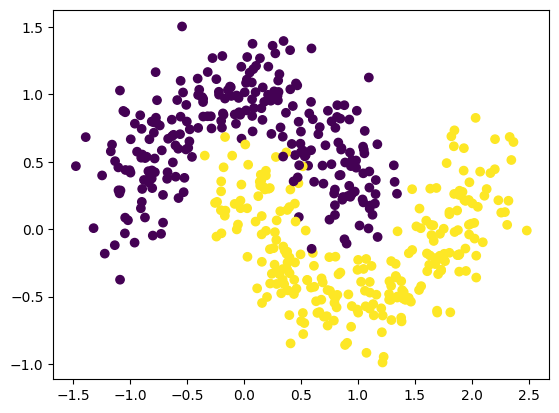

In [239]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

# lr = LogisticRegression() # add some params
# svm = SVC(kernel='linear') # here too

In [241]:
### YOUR CODE HERE
lr = LogisticRegression(C=10, random_state=42)
svm = SVC(kernel='linear', C=5, random_state=42)

In [242]:
def draw_scatter(ax,x_x, y_y, z_z, title):
    ax.contourf(x_x, y_y, z_z)
    ax.scatter(moons_points[:, 0], moons_points[:, 1], c = moons_labels, edgecolor="white", alpha=1.0)
    ax.set_title(title)

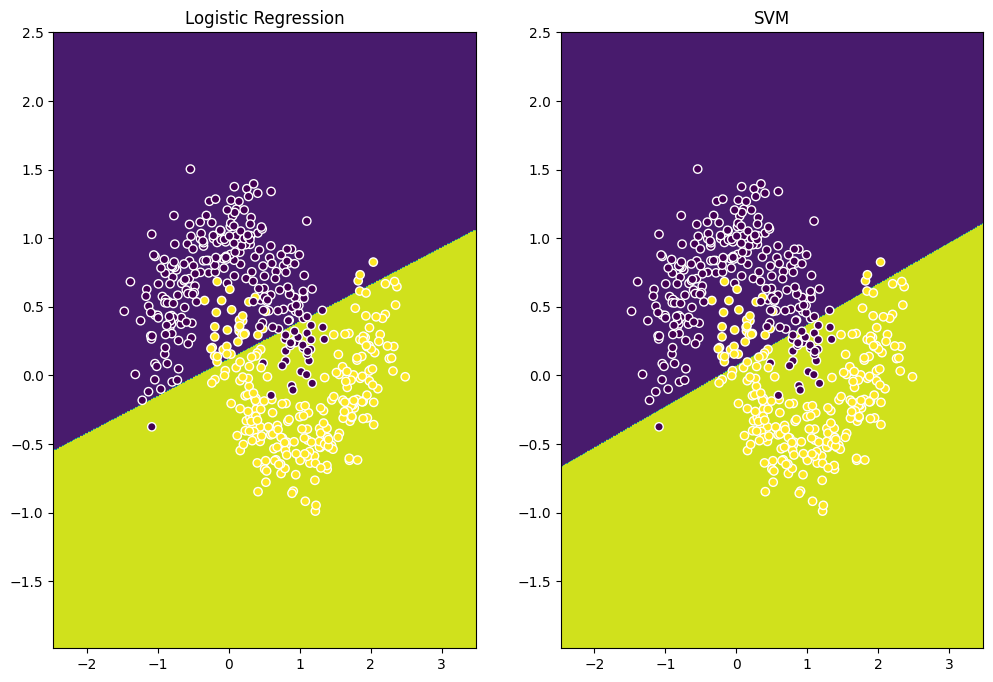

In [243]:
lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

x_min, x_max = moons_points[:, 0].min() - 1, moons_points[:, 0].max() + 1
y_min, y_max = moons_points[:, 1].min() - 1, moons_points[:, 1].max() + 1

step = 0.01
x_x, y_y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

z_z_lr = lr.predict(np.c_[x_x.ravel(), y_y.ravel()]).reshape(x_x.shape)
z_z_svm = svm.predict(np.c_[x_x.ravel(), y_y.ravel()]).reshape(x_x.shape)

draw_scatter(ax[0], x_x, y_y, z_z_lr, "Logistic Regression")
draw_scatter(ax[1], x_x, y_y, z_z_svm, "SVM")
plt.show()

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

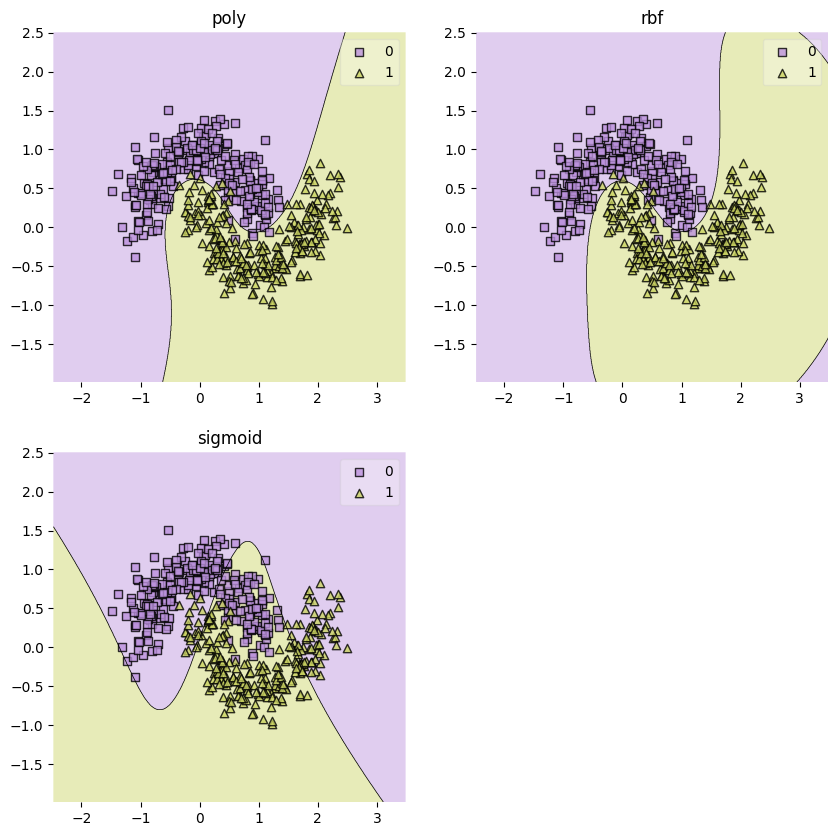

In [244]:
### YOUR CODE HERE
svm_poly = SVC(kernel='poly', coef0=0.3)
svm_rbf = SVC(kernel='rbf')
svm_sigmoid = SVC(kernel='sigmoid')

svm_poly_clf = svm_poly.fit(moons_points, moons_labels)
svm_rbf_clf = svm_rbf.fit(moons_points, moons_labels)
svm_sigmoid_clf = svm_sigmoid.fit(moons_points, moons_labels)

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('poly')
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_poly_clf, colors='#bc92dd,#cbd462')

plt.subplot(2,2,2)
plt.title('rbf')
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_rbf_clf, colors='#bc92dd,#cbd462')

plt.subplot(2,2,3)
plt.title('sigmoid')
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_sigmoid_clf, colors='#bc92dd,#cbd462')

plt.show()

In [245]:
print('poly score:',svm_poly_clf.score(moons_points, moons_labels))
print('rbf score:', svm_rbf_clf.score(moons_points, moons_labels))
print('sigmoid score:', svm_sigmoid_clf.score(moons_points, moons_labels))


poly score: 0.974
rbf score: 0.974
sigmoid score: 0.648


Построили три графика по разделению данных с помощью 3 кернелов(ядер). Из графиков наглядно видно, что sigmoid-kernel ошиблось в разделении данных и неправильно их разделила. Ядра poly и rbf с данной задачей справились на отлично.

Также для полиномиального ядра подбирался коэффициент и был выбран равный coef0=0.3 опытным путем. Понижение снижало общую точность, а повышение не давало значимых результатов. Также для полиномиального ядра были проверены разные параметры степени degree. Оставил по умолчанию, равным degree=3, тк понижение ломало разделение, а повышение вызвало переобучение

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

<Axes: >

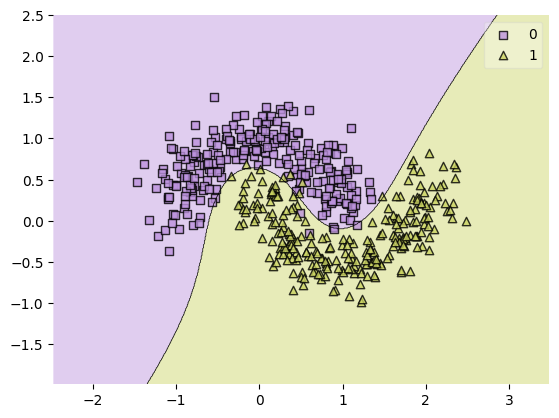

In [246]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### YOUR CODE HERE
poly = PolynomialFeatures(degree = 3)
lr = LogisticRegression(C=10)

lrc = make_pipeline(poly, lr)
lrc.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, clf=lrc, colors='#bc92dd,#cbd462')

In [247]:
print('Score:', lrc.fit(moons_points, moons_labels).score(moons_points, moons_labels))

Score: 0.978


После применения полиномиального метода генерации фичей показатель логистической регрессии получился очень высокого уровня 0.978 и в целом этот метод показал себя лучше метода опорных векторов SVM(или не хуже точно). Также при реализации PolynomialFeatures была применена степень равной 3, тк степени 2 не хватило и график был слишком не выпуклым и не достаточно хорошо разделял данные. Увеличение степени до 4х позволяет еще чуть лучше выкрутить скор в сторону увеличения, но возможно переобучение, к тому же тратится большее кол-во вычислительных ресурсов.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

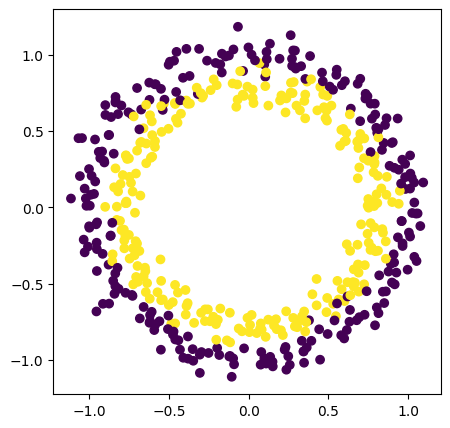

In [248]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

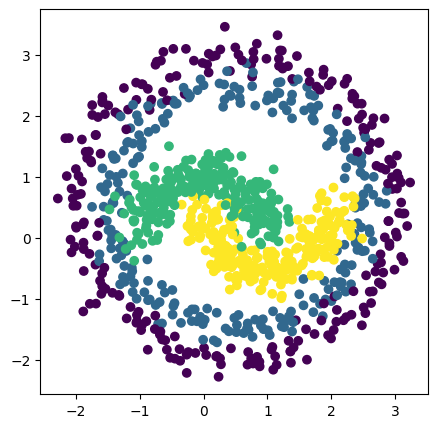

In [249]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

<Axes: title={'center': 'rbf'}>

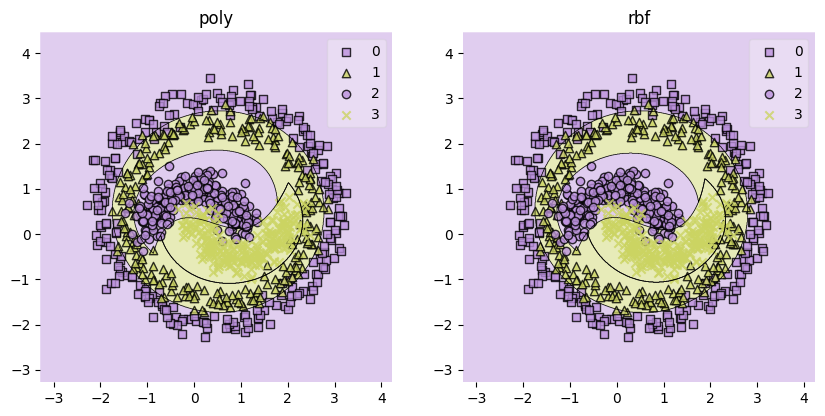

In [250]:
### YOUR CODE HERE
svm_poly = SVC(kernel='poly',coef0=0.5)
svm_rbf = SVC(kernel='rbf')

svm_poly_clf = svm_poly.fit(points, labels)
svm_rbf_clf = svm_rbf.fit(points, labels)

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('poly')
plot_decision_regions(X=points, y=labels, clf=svm_poly_clf, colors='#bc92dd,#cbd462')

plt.subplot(2,2,2)
plt.title('rbf')
plot_decision_regions(X=points, y=labels, clf=svm_rbf_clf, colors='#bc92dd,#cbd462')

In [251]:
print('poly score:', svm_poly.fit(points, labels).score(points, labels))
print('rbf score:', svm_rbf.fit(points, labels).score(points, labels))

poly score: 0.918
rbf score: 0.921


<Axes: >

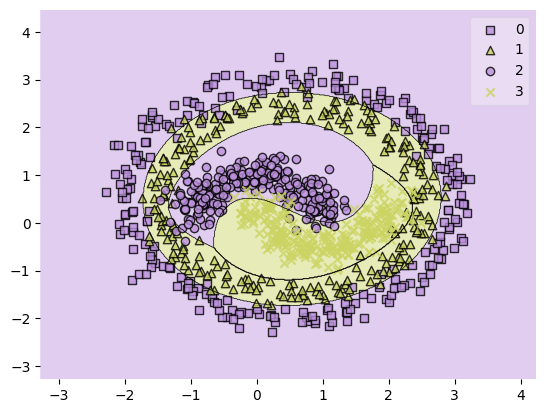

In [252]:
poly = PolynomialFeatures(degree = 3)
lr = LogisticRegression(C=10)

lrc = make_pipeline(poly, lr)
lrc.fit(points, labels)
plot_decision_regions(points, labels, clf=lrc, colors='#bc92dd,#cbd462')

In [253]:
print('Score:', lrc.fit(points, labels).score(points, labels), 'degree:', 3)

Score: 0.932 degree: 3


<Axes: >

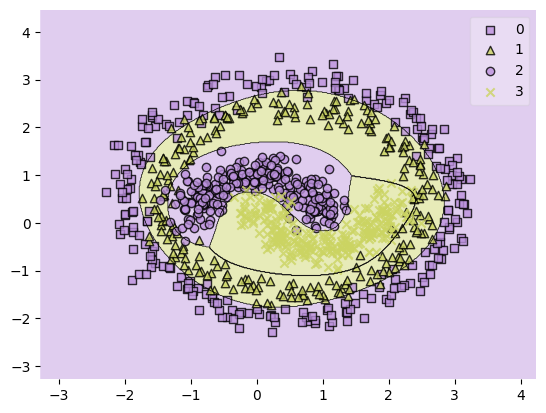

In [254]:
poly = PolynomialFeatures(degree = 4)
lr = LogisticRegression(C=10)

lrc = make_pipeline(poly, lr)
lrc.fit(points, labels)
plot_decision_regions(points, labels, clf=lrc, colors='#bc92dd,#cbd462')

In [255]:
print('Score:', lrc.fit(points, labels).score(points, labels), 'degree:', 4)

Score: 0.944 degree: 4


Необходимо отметить, что полиномиальные признаки улучшают показатели точности.
Для решения без добавления таких признаков для решения на основе SVM получились следующие значения:
poly score: 0.918
rbf score: 0.921
При этом стоит отметить, что ядро 'rbf' чуть лучше посчитало, чем 'poly'. Но разница минимальна.

Далее для решения была использована логистическая регрессия, но с добавлением полиномиальных признаков.
После проведенных экспериментов для данной задачи из 4х классов более лучшим решением стало использовать степень равной 4. Выше продемонстрированы оба графика и подсчитан скор. Но в целом разница по скору не такая значимая, как хотелось и равна 0.944 против 0.932(для степени 3). При этом затрачиваемые ресурсы для расчета 4й степени выше. Но данные показатели для логистической регрессии в любом случае чуть выше, чем при использовании SVM.